In [2]:
import sys
from src import model, visualization, evaluate, data
import src.lib.useful_functions as uf

from IPython.display import display, clear_output
import numpy as np
import yaml
import os
import cv2 as cv
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_dataset = pd.read_csv("reports/dataset_2020.csv")
print(len(df_dataset))
night_img_list = []
for i in range(len(df_dataset)):
    M = len(df_dataset.values[i][3])
    str_list = df_dataset.values[i][3][1:M-1].replace('\'',"" )
    str_list = str_list.replace(" ", "")
    lista = str_list.split(",")
    
    night_img_list = night_img_list + lista
print(len(night_img_list))
print(night_img_list[0] )

366
23133
ART_2020001_000021.FR


In [4]:
#Muy lento, buscar forma de optimizar
#Demora 35 seg para 100 imagenes, para 51219 se espera 5 hs aprox

# fr_folder_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/C02-FR/2020'
# mk_folder_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/C02-MK/2020'
# meta_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/meta'

# #Iterate from second img to last
# fieldnames = ['Img','Min','Max','Mean','Black Rows','Black cols', 'Next img' , 'RMSE']

# with open(   'reports/img_features.csv', 'w', newline='') as csvfile:
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()

#     img1_filename = sorted(os.listdir(fr_folder_path))[0]
    
#     img1 = data.load_img(meta_path=meta_path,
#                         img_name=img1_filename,
#                         mk_folder_path=mk_folder_path,
#                         img_folder_path=fr_folder_path
#                         )
#     for filename in sorted(os.listdir(fr_folder_path))[1:]:
#         if (not img1_filename in night_img_list ): #no es una imagen noscturna
#             img2_filename = filename
#             img2 = data.load_img(meta_path=meta_path,
#                                 img_name=img2_filename,
#                                 mk_folder_path=mk_folder_path,
#                                 img_folder_path=fr_folder_path
#                                 )
#             rmse = np.sqrt(np.mean((img1 - img2)**2))
#             row_dict = {}
#             row_dict['Img'] = img1_filename
#             row_dict['Min'] = np.min(img1)
#             row_dict['Max'] = np.max(img1)
#             row_dict['Mean'] = np.mean(img1)
#             row_dict['Next img'] = img2_filename
#             row_dict['RMSE'] = rmse
#             #horizontal black lines finder
#             sum_cols = np.sum(img1,axis=1)
#             aux=0
#             counter = 0
#             for i in range(sum_cols.shape[0]-1):
#                 if sum_cols[i] == sum_cols[i+1] and sum_cols[i] == 0:
#                     aux +=1
#                 if aux > counter :
#                     counter = aux 
#                     aux=0
            
#             row_dict['Black Rows'] = counter
            
#             #vertical black lines finder
#             sum_rows = np.sum(img1,axis=0)
#             aux=0
#             counter = 0
#             for i in range(sum_rows.shape[0]-1):
#                 if sum_rows[i] == sum_rows[i+1] and sum_rows[i] == 0:
#                     aux +=1
#                 if aux > counter :
#                     counter = aux 
#                     aux=0
                    
#             row_dict['Black cols'] = counter

#             writer.writerow(row_dict)
            
#             img1 = img2
#             img1_filename = img2_filename
#         else: #es una imagen nocturna
#             img1_filename = filename

In [4]:
df_features = pd.read_csv("reports/img_features.csv") 
# fieldnames = ['Img','Min','Max','Mean','Black Rows','Black cols', 'Next img' , 'RMSE']
print('Images analized: ',len(df_features))

Images analized:  28093


In [5]:
df_features['Min'].describe()
df_features['Max'].describe()

count    28093.000000
mean       202.536230
std         81.203407
min          0.000000
25%        138.736620
50%        189.804260
75%        255.328500
max        523.169400
Name: Max, dtype: float64

Min Histogram
100.0
(array([763]),)


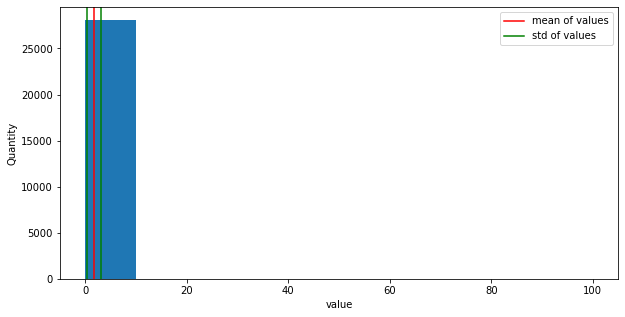

Max Histogram


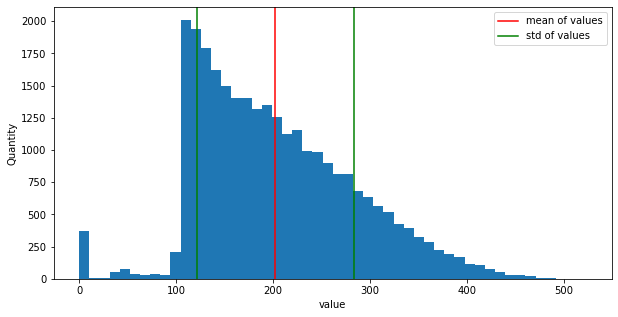

Mean Histogram


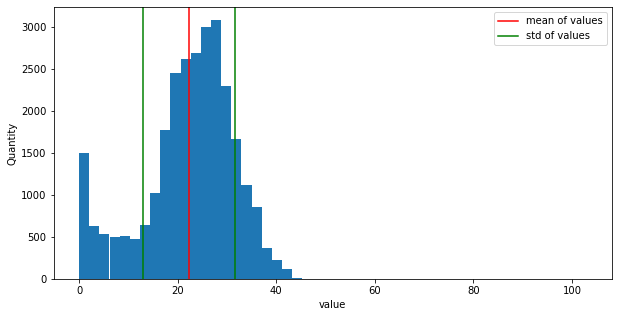

In [8]:
img_max = df_features['Max'].tolist()
img_min = df_features['Min'].tolist()
img_mean = df_features['Mean'].tolist()
black_rows = df_features['Black Rows'].tolist()
black_cols = df_features['Black cols'].tolist()
black_rows = list(filter(lambda black_rows: black_rows >0, black_rows))
black_cols = list(filter(lambda black_cols: black_cols >0, black_cols))
print('Min Histogram')
print(np.max(img_min))
print(np.where(img_min == np.max(img_min)))
visualization.plot_histogram(img_min,bins=10, normalize = False)
print('Max Histogram')
visualization.plot_histogram(img_max,bins=50, normalize= False)
print('Mean Histogram')
visualization.plot_histogram(img_mean,bins=50, normalize = False)

BLACK ROWS


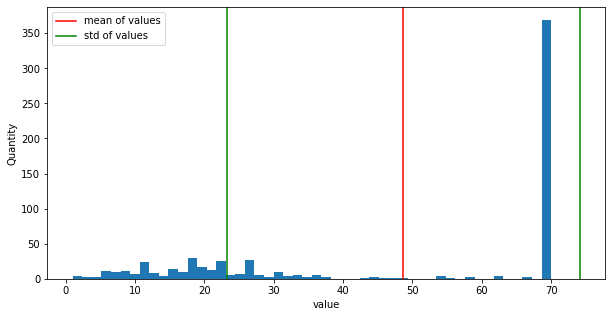

BLACK COLUMNS


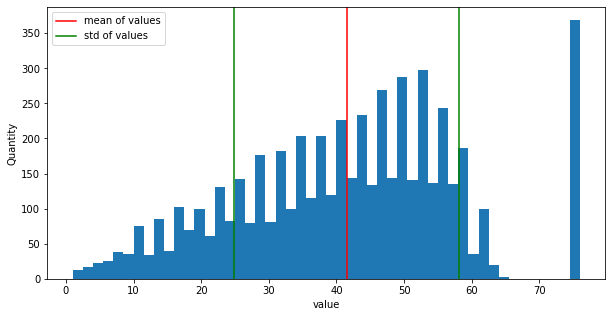

In [36]:
black_rows = df_features['Black Rows'].tolist()
black_cols = df_features['Black cols'].tolist()
black_rows = list(filter(lambda black_rows: black_rows >0, black_rows))
black_cols = list(filter(lambda black_cols: black_cols >0, black_cols))

print('BLACK ROWS')
visualization.plot_histogram(black_rows,bins=50, normalize= False)
print('BLACK COLUMNS')
visualization.plot_histogram(black_cols,bins=50, normalize = False)

In [36]:
print('Cantidad imagenes:',len(df_features))

blackRow_filename = []
low_max = []
night = []

for i in range(len(df_features)):
    if df_features['Max'][i]> 0 and df_features['Black Rows'][i] > 0 and df_features['Mean'][i] > 1 :
        aux = [df_features['Img'][i] ,  df_features['Black Rows'][i]]
        blackRow_filename.append(aux )
print('Imagenes con filas negras:',len(blackRow_filename))
    
for i in range(len(df_features)):
    if 0< df_features['Max'][i] <100 and df_features['Mean'][i] > 5 :
        aux = [df_features['Img'][i] ,  df_features['Max'][i]]
        low_max.append(aux )
print('Imagenes con maximo bajo:',len(low_max))

for i in range(len(df_features)):
    if df_features['Max'][i] == 0 :
        aux = [df_features['Img'][i] ,  df_features['Mean'][i]]
        night.append(aux)
print('Imagenes amaneciendo/anocheciendo:', len(night))

Cantidad imagenes: 28093
Imagenes con filas negras: 58
Imagenes con maximo bajo: 7
Imagenes amaneciendo/anocheciendo: 369


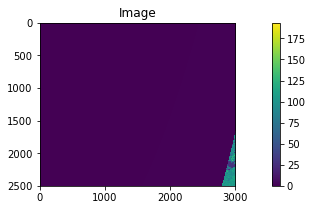

ART_2020043_091004.FR
mean: 1.4384724
min: 0.0


KeyboardInterrupt: 

In [37]:
#SERVER
fr_folder_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/C02-FR/2020'
mk_folder_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/C02-MK/2020'
meta_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/meta'


comentario = []
for filename in night:
    
    img_filename = filename[0]
    #img_filename = 'ART_2020001_223021.FR'

    img1 = data.load_img(meta_path=meta_path,
                img_name=img_filename,
                mk_folder_path=mk_folder_path,
                img_folder_path=fr_folder_path
        )

    visualization.show_image_w_colorbar(img1)
    print(img_filename)
    print('mean:',np.mean(img1))
    print('min:',np.min(img1))
    print('max:',np.max(img1))
    
     
    print('Black rows:', filename[1])
    M,N = img1.shape
    if (np.sum(img1[0:M//2,0:N//2])==0):
        print('Q1 es 0')
    if (np.sum(img1[0:M//2,N//2:N])==0):  
        print('Q2 es 0')
    if (np.sum(img1[M//2:M,0:N//2])==0):
        print('Q3 es 0')
    if (np.sum(img1[M//2:M,N//2:N])==0):
        print('Q4 es 0')
        
    #comentario.append(input())
    clear_output(wait=True)
    

In [12]:
print(comentario[18])

b
